<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Ebola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
Ebola = pd.read_csv('/content/drive/My Drive/Trabalho_Final_Inteligencia/EBOLA _REGRESSAO.csv', sep=';')
Ebola


,Pais,Ano,Casos_Confirmados,Mortes_Confirmadas,Casos_Suspeitos
0,Guinea,2016,3.351,2.083,0.000
1,Spain,2016,1.000,0.000,0.000
2,Sierra Leone,2016,8.704,3.589,5.131
3,Senegal,2016,1.000,0.000,0.000
4,Mali,2016,7.000,0.000,0.000
5,United Kingdom,2016,1.000,0.000,0.000
6,Liberia,2016,9.000,3.000,5.636
7,Italy,2016,3.151,0.000,0.000
8,Nigeria,2016,20.000,7.000,0.000
9,United States of America,2016,6.000,2.000,0.000


**Análises Exploratórias:**

O arquivo escolhi foi o estudo da transição da doença Ebola, portanto o foco será na quantidade de casos confirmados por país afetado, considerando somente o ano de 2016 (último período disponilibizado na pesquisa). 

In [0]:
casos_confir = Ebola.groupby('Pais').sum()['Casos_Confirmados']
casos_confir

Pais
Guinea                       3.351
Italy                        3.151
Liberia                      9.000
Mali                         7.000
Nigeria                     20.000
Senegal                      1.000
Sierra Leone                 8.704
Spain                        1.000
United Kingdom               1.000
United States of America     6.000
Name: Casos_Confirmados, dtype: float64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'COMPARATIVO ENTRE PAÍSES')

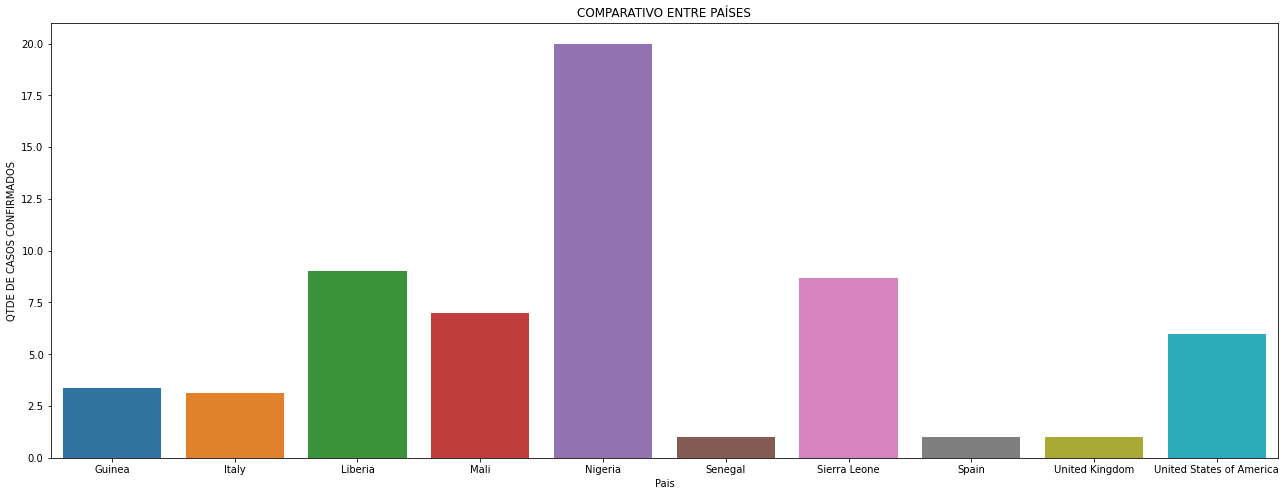

In [0]:
sns.barplot(casos_confir.index, casos_confir.values)
plt.rcParams['figure.figsize']=(22,7)
plt.ylabel('QTDE DE CASOS CONFIRMADOS')
plt.title('COMPARATIVO ENTRE PAÍSES')


Na análise exploratória, podemos observar que a Nigériaé o país mais afetado com 20k casos confirmados, seguido da Liberia com 9k.

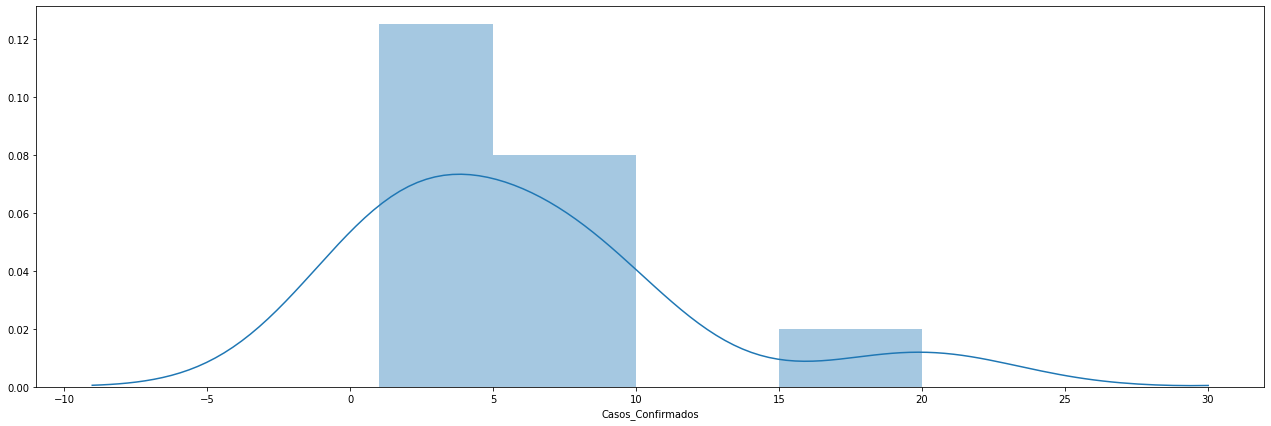

In [0]:
classes = [1.000,5.000,10.0000,15.000,20.000]
sns.distplot(Ebola['Casos_Confirmados'], bins = classes)

Pelo histograma pode-se observar que a cursa está assimetrica, pois está direcionada para o lado esquerdo do gráfico. Os casos confirmados estão concentrados em média entre 1k e 5k. 

In [0]:
casos_confirm2 = Ebola['Casos_Confirmados'].describe()
casos_confirm2

count    10.000000
mean      6.020600
std       5.806523
min       1.000000
25%       1.537750
50%       4.675500
75%       8.278000
max      20.000000
Name: Casos_Confirmados, dtype: float64

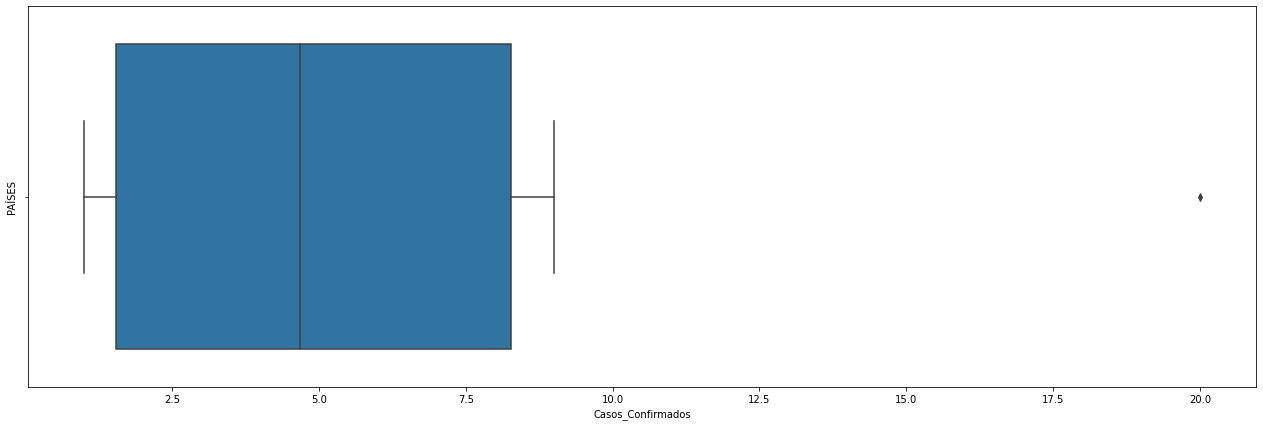

In [0]:
sns.boxplot(x='Casos_Confirmados' , data=Ebola)
plt.ylabel('PAÍSES')
plt.rcParams['figure.figsize']=(11,7)


A média de casos por país é de 6K e com outlier com 1k os países Espanha e Reino Unido. 

**Regressão Linear:**

Prever o número de mortes, a partir do número de casos suspeitos e casos confirmados

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
rl = LinearRegression()
rl.fit(Ebola[['Casos_Confirmados' , 'Casos_Suspeitos']] , Ebola['Mortes_Confirmadas'])
print(rl.coef_,rl.intercept_)

[0.35331054 0.11824807] -0.4872591128769186


Considerando que este valor é assrtivo, visto que está menor que zero e a probalidade de ser número aleatório é baixo. 

In [0]:
def prever_mortes(confirmados, suspeitos):
  mortes = confirmados * 0.353 + suspeitos * 0.118 - 0.487
  return mortes

In [0]:
confirmados_suspeitos_fut = pd.DataFrame({
    'Casos_Confirmados' : [10,20,30,40,50,60,70,80,90,100],
    'Casos_Suspeitos' : [1,2,3,4,5,6,7,8,9,10]})
mortes_fut = rl.predict(confirmados_suspeitos_fut)
mortes_fut


array([ 3.16409432,  6.81544775, 10.46680118, 14.11815461, 17.76950804,
       21.42086147, 25.0722149 , 28.72356834, 32.37492177, 36.0262752 ])

In [0]:
r2 = rl.score(Ebola[['Casos_Confirmados' ,'Casos_Suspeitos']] , Ebola['Mortes_Confirmadas'])
r2

0.8560514238611331

Com a validação do r2, podemos concluir que a previsão foi assertiva por está muito próximo de zero. 

In [0]:
mortes_prev = rl.predict(Ebola[['Casos_Confirmados', 'Casos_Suspeitos']])
mortes_prev

array([ 0.69668449, -0.13394858,  3.19468666, -0.13394858,  1.98591464,
       -0.13394858,  3.35898186,  0.62602238,  6.5789516 ,  1.6326041 ])

Calculando os erros

In [0]:
from sklearn import metrics

In [0]:
rr = metrics.r2_score(Ebola['Mortes_Confirmadas'] , mortes_prev)
rr

0.8560514238611331

In [0]:
err_quad = metrics.mean_squared_error(Ebola['Mortes_Confirmadas'] , mortes_prev)
err_quad

0.6908070806935525

In [0]:
import numpy as np

err = np.sqrt(err_quad)
err

0.8311480498043369

Probalidade de erro de 1% para mais ou para menos aproximadamente

In [0]:
import statsmodels.api as sm

Ebola[['Casos_Confirmados' , 'Casos_Suspeitos']]

confirmados1_suspeitos1 = sm.add_constant(Ebola[['Casos_Confirmados' , 'Casos_Suspeitos']])
confirmados1_suspeitos1


,const,Casos_Confirmados,Casos_Suspeitos
0,1.0,3.351,0.000
1,1.0,1.000,0.000
2,1.0,8.704,5.131
3,1.0,1.000,0.000
4,1.0,7.000,0.000
5,1.0,1.000,0.000
6,1.0,9.000,5.636
7,1.0,3.151,0.000
8,1.0,20.000,0.000
9,1.0,6.000,0.000


In [0]:
rl1 = sm.OLS(Ebola['Mortes_Confirmadas'] , confirmados1_suspeitos1).fit()
rl1.summary()


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Mortes_Confirmadas   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     20.81
Date:                Mon, 06 Apr 2020   Prob (F-statistic):            0.00113
Time:                        01:11:21   Log-Likelihood:                -12.340
No. Observations:                  10   AIC:                             30.68
Df Residuals:                       7   BIC:                             31.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4873      0.471     -1.035      0.335      -1.600       0.626
Casos_Confirmados     0.3533      0.059      5.987      0.001       0.214       0.493
Casos_Suspeitos       0.1182      0.151      0.784      0.459      -0.238       0.475
==============================================================================
Omnibus:                        5.812   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                1.893
Skew:                          -0.917   Prob(JB):                        0.388
Kurtosis:                       4.085   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Acima podemos ver mais detalhes da regessão e mais uma vez confirmar que todo o cálculo esta assertivo. Podemos dizer as variáveis são dependente. 

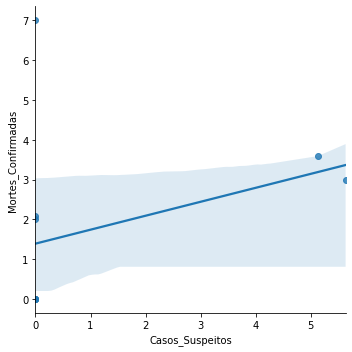

In [0]:
sns.lmplot('Casos_Suspeitos' , 'Mortes_Confirmadas' , data=Ebola)

In [0]:
Ebola.corr()

,Ano,Casos_Confirmados,Mortes_Confirmadas,Casos_Suspeitos
Ano,NaN,NaN,NaN,NaN
Casos_Confirmados,NaN,1.000000,0.918368,0.257277
Mortes_Confirmadas,NaN,0.918368,1.000000,0.344967
Casos_Suspeitos,NaN,0.257277,0.344967,1.000000


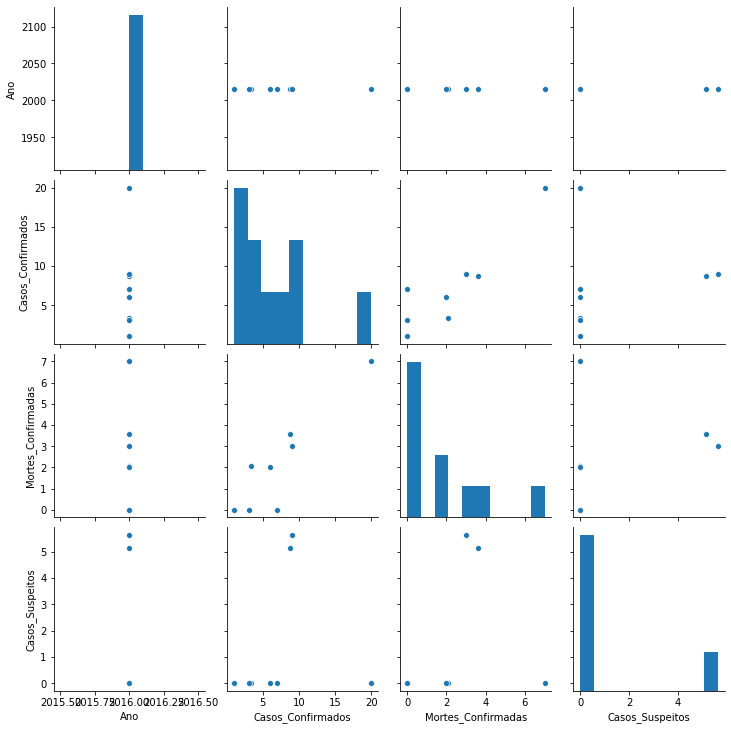

In [0]:
sns.pairplot(Ebola)